# Práctica 0 - Aprendizaje automatico y minería de datos

Para empezar la práctica, hicimos la funcion encargada de integrar por el método de montecarlo (usando bucles); mostrando los puntos por pantalla.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def funcionIntegrable(x):
    return (((x**3) / 3)-3*x*x + 3*x + 30) #x^3/3 - 3x^2 + 3x + 30 

def maximoFuncion(fun,a,b,resolucion = 1000):
    return np.amax(fun(np.linspace(a,b,resolucion)))

Primero hicimos la versión iterativa ya que es el tipo de programacion al que estamos mas acostumbrados. Para ello usamos un bucle el cual da num_puntos de vueltas y es donde disparamos puntos aleatorios (x,y) en el intervalo que nos interesa y despues se marca cuales de esos puntos están por debajo del máximo de la funcion. Ese valor se ha calculado previamente con el método maximoFuncion.

valor integral : 176.66666666666663


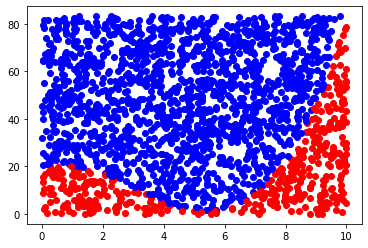

In [3]:
def integra_iterativa_pinta(fun, a, b, num_puntos = 2000):
    
    dentro = 0
    maxY = maximoFuncion(fun,a,b)

    for i in range(num_puntos):
        rX = np.random.random() * (b-a) + a
        rY = np.random.random() * maxY

        if(rY < fun(rX)):            
            plt.scatter(rX, rY, c = 'red')
            dentro += 1
        else:            
            plt.scatter(rX, rY, c = 'blue')


    valorIntegral = (dentro / num_puntos) * (b-a) * maxY

    print('valor integral :',valorIntegral)
    plt.show()


integra_iterativa_pinta(funcionIntegrable,0,10)

Tras esto hicimos la versión que usa los calculos vectoriales de los arrays de NumPy lo que simplificó algo mas el codigo ya que no era necesario el bucle explícito ya que NumPy se encarga de hacer los calculos para cada elemento del array. Con esto tambien pusimos el calculo de tiempo en ambas funciones para mas adelante comparar ambas implementaciones en temas de rendimiento y tiempo de ejecución.

In [8]:
def integra_mc_rapida(fun, a, b, num_puntos = 10000):
    
    dentro = 0
    maxY = maximoFuncion(fun,a,b)

    tic = time.process_time()
    
    rX = np.random.rand(num_puntos) * (b-a) + a
    rY = np.random.rand(num_puntos) * maxY

    dentro = np.sum(rY < fun(rX))

    toc = time.process_time()

    valorIntegral = (dentro / num_puntos) * (b-a) * maxY

    return 1000 * (toc - tic)


def integra_mc_iterativa(fun, a, b, num_puntos = 10000):
    
    dentro = 0
    maxY = maximoFuncion(fun,a,b)

    tic = time.process_time()
    for i in range(num_puntos):
        rX = np.random.random() * (b-a) + a
        rY = np.random.random() * maxY

        if(rY < fun(rX)):            
            dentro += 1

    toc = time.process_time()

    valorIntegral = (dentro / num_puntos) * (b-a) * maxY

    return 1000 * (toc - tic)


Para comparar ambos métodos en igualdad de condiciones se ha hecho una funcion cuyo objetivo es, dados ciertos casos de prueba, ver el tiempo que tarda cada implementación del Método de Monte Carlo. Luego esos datos son representados en una gráfica que muestra de forma mas visual esta información.
Marcado con color rojo son los tiempos del método por bucle y en color azul los tiempos de ejecución del método de cálculo vectorial.
Queda patente que la versión de cálculo vectorial se ve menos afectada por el aumento de los puntos a generar ya que aunque el tiempo se incrememta lo hace muy levemente mientras que en la versión por bucle en cuanto tienen que ser muchos puntos el tiempo aumenta muchisimo más.

Importante: a la hora de generar sizes es importante que se especifique el dtype como int para asi poder usarlo en la llamada a las funciones. 

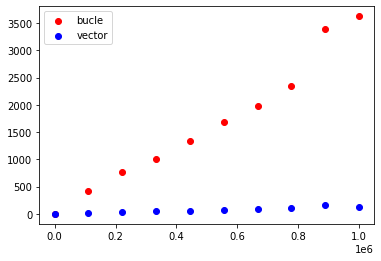

In [9]:
def compara_tiempos():
    sizes = np.linspace(1, 1000000, 10, dtype='int')
    times_bucle = []
    times_rapida = []

    for size in sizes:
        times_bucle+= [integra_mc_iterativa(funcionIntegrable, 0, 10, size)]
        times_rapida += [integra_mc_rapida(funcionIntegrable, 0, 10, size)]

    plt.figure()
    plt.scatter(sizes, times_bucle, c = 'red', label='bucle')
    plt.scatter(sizes, times_rapida, c = 'blue', label='vector')
    plt.legend()
    plt.show()
compara_tiempos()